In [17]:
# Part A: Data Understanding and Cleaning
# load dataset 
import pandas as pd
df=pd.read_csv("Flipkart_Mobiles.csv")
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [19]:
# Basic 
df.isna().sum()
df=df.dropna()
df=df.drop_duplicates()

In [20]:
# To convert some values into integer 

# Extract RAM from memory
df['RAM_GB']=df['Memory'].str.extract(r'(\d+)').astype(int)

# Extract Storage from memory
df['Storage_GB']=df['Storage'].str.extract(r'(\d+)').astype(int)

# Create new columns Discount and Discount-Precentage
df['Discount']=df['Original Price']-df['Selling Price']
df['Discount_pct']=(df['Discount']/df['Original Price'])*100

In [21]:
df

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price,RAM_GB,Storage_GB,Discount,Discount_pct
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,4,64,4000,25.015635
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,4,64,4000,25.015635
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,6,128,4000,22.234575
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,6,128,4000,22.234575
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,4,64,4000,25.015635
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,6,128,0,0.000000
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,6,128,2960,10.404584
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,8,128,4250,13.496777
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,8,128,0,0.000000


In [24]:
# Part C: Simple Linear Regression (Single Feature

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np

X=df[['RAM_GB']]
y=df['Selling Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

print("Slope:",model.coef_)
print("Intercept:",model.intercept_)
print("R2:",r2_score(y_test,y_pred))

Slope: [-31.37600431]
Intercept: 24305.52699184661
R2: 0.005934879559606476


In [23]:
# Part D: Multiple Linear Regression
X_m=df[['RAM_GB','Storage_GB','Rating','Discount','Discount_pct']]
y=df['Selling Price']

X_train,X_test,y_train,y_test=train_test_split(X_m,y,test_size=0.2,random_state=42)

model_m=LinearRegression()
model_m.fit(X_train,y_train)

y_pred_m=model_m.predict(X_test)

print("Slope:",model_m.coef_)
print("Intercept:",model_m.intercept_)
print("R2:",r2_score(y_test,y_pred))

Slope: [-3.38149037e+00  1.61393300e+02  1.91056784e+04  1.54987919e+00
 -6.59998946e+02]
Intercept: -69186.11071172603
R2: 0.005934879559606476


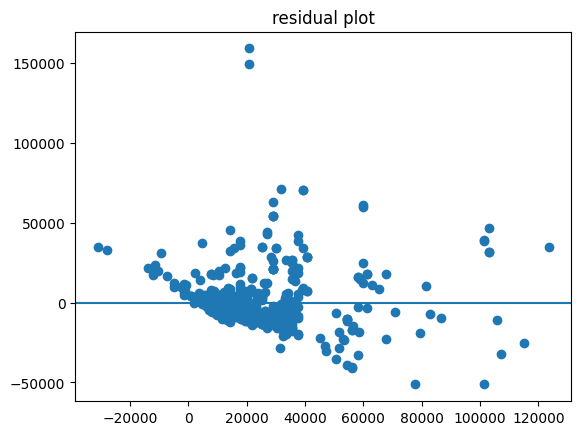

In [26]:
# Part E: Linar Regression Assumption Checks
import matplotlib.pyplot as plt
residual=y_test-y_pred_m
plt.scatter(y_pred_m,residual)
plt.axhline(0)
plt.title('residual plot')
plt.show()

In [31]:
# Part F: Gradient Descent
X=df['RAM_GB'].values
y=df['Selling Price'].values

X=(X-X.mean())/X.std()

m=0
c=0
alpha=0.01
epochs=1000
n=len(y)

for i in range(epochs):
    y_pred=m*X+c
    error=y_pred-y

    dm=(1/n)*np.sum(error*X)
    dc=(1/n)*np.sum(error)

    m-=alpha*dm
    c-=alpha*dc

print("m:",m,"c:",c)

m: -2346.399086360539 c: 23909.50731027082


In [32]:
# Part G: Regularization(Ridge & Lasso)
# Ridge (L2 Regularization)

from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

0.005934879450956165

In [34]:
# Lasso (L1 Regularization)
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso.score(X_test,y_test)

0.0059348787825422855

In [37]:
# Part H: Random Forest Regression(Best Model)
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=300,random_state=42)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)
print("R2:",r2_score(y_test,y_pred_rf))

R2: 0.1127956415519582
